In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [33]:
import sqlite3

conn = sqlite3.connect("/kaggle/input/github-code-snippets-development-sample/snippets-dev/snippets-dev.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


[('snippets',)]


In [34]:
import sqlite3
import csv

# Connect to database
conn = sqlite3.connect("/kaggle/input/github-code-snippets-development-sample/snippets-dev/snippets-dev.db")
cursor = conn.cursor()

# Select all rows
cursor.execute("SELECT * FROM snippets")
rows = cursor.fetchall()

# Get column names
col_names = [desc[0] for desc in cursor.description]

# Save to CSV
with open("snippets.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(col_names)
    writer.writerows(rows)

print("CSV created successfully!")


CSV created successfully!


In [35]:
df=pd.read_csv('/kaggle/working/snippets.csv')
df_og=df.copy()
df

,id,snippet,language,repo_file_name,github_repo_url,license,commit_hash,starting_line_number,chunk_size
0,491,test/files/normalise.jpg.png\ntest/files/norma...,DOTFILE,NodeBB/NodeBB/.gitignore,https://github.com/NodeBB/NodeBB,GPL-3.0,21634e2681fb1329bcbab7b2e19418ebdb1012e1\n,65,5
1,512,"a computer network, with no transfer of a copy...",UNKNOWN,NodeBB/NodeBB/LICENSE,https://github.com/NodeBB/NodeBB,GPL-3.0,21634e2681fb1329bcbab7b2e19418ebdb1012e1\n,100,5
2,584,the predecessor has it or can get it with reas...,UNKNOWN,NodeBB/NodeBB/LICENSE,https://github.com/NodeBB/NodeBB,GPL-3.0,21634e2681fb1329bcbab7b2e19418ebdb1012e1\n,460,5
3,610,"THERE IS NO WARRANTY FOR THE PROGRAM, TO THE...",UNKNOWN,NodeBB/NodeBB/LICENSE,https://github.com/NodeBB/NodeBB,GPL-3.0,21634e2681fb1329bcbab7b2e19418ebdb1012e1\n,590,5
4,627,const nconf = require('nconf');\n\nconst db = ...,JavaScript,NodeBB/NodeBB/test/groups.js,https://github.com/NodeBB/NodeBB,GPL-3.0,21634e2681fb1329bcbab7b2e19418ebdb1012e1\n,5,5
...,...,...,...,...,...,...,...,...,...
4849995,100315862,"border-style: solid;\n}\n\n.bs-tooltip-top, ...",UNKNOWN,ColorlibHQ/AdminLTE/dist/css/adminlte.css,https://github.com/ColorlibHQ/AdminLTE,MIT,0e9713c90510b8b58a8f683470e527c14e309305\n,6225,5
4849996,100315909,.carousel {\n position: relative;\n}\n\n.caro...,UNKNOWN,ColorlibHQ/AdminLTE/dist/css/adminlte.css,https://github.com/ColorlibHQ/AdminLTE,MIT,0e9713c90510b8b58a8f683470e527c14e309305\n,6460,5
4849997,100315924,".carousel-fade .active.carousel-item-left,\n...",UNKNOWN,ColorlibHQ/AdminLTE/dist/css/adminlte.css,https://github.com/ColorlibHQ/AdminLTE,MIT,0e9713c90510b8b58a8f683470e527c14e309305\n,6535,5
4849998,100315970,}\n\n.bg-success {\n background-color: #28a74...,UNKNOWN,ColorlibHQ/AdminLTE/dist/css/adminlte.css,https://github.com/ColorlibHQ/AdminLTE,MIT,0e9713c90510b8b58a8f683470e527c14e309305\n,6765,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850000 entries, 0 to 4849999
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    int64 
 1   snippet               object
 2   language              object
 3   repo_file_name        object
 4   github_repo_url       object
 5   license               object
 6   commit_hash           object
 7   starting_line_number  int64 
 8   chunk_size            int64 
dtypes: int64(3), object(6)
memory usage: 333.0+ MB


In [37]:
df.describe(include="object")

,snippet,language,repo_file_name,github_repo_url,license,commit_hash
count,4849523,4850000,4850000,4850000,4850000,4850000
unique,4412517,21,1150333,1621,21,1621
top,\n\n\n\n\n,UNKNOWN,php/php-src/ext/fileinfo/tests/cve-2014-3538私は...,https://github.com/torvalds/linux,NOASSERTION,29c395c77a9a514c5857c45ceae2665e9bd99ac7\n
freq,12309,1574797,9827,285258,1903296,285258


In [38]:
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
df['language'].value_counts()

language
UNKNOWN       1574797
C              617132
JavaScript     448591
Go             405726
Java           375772
C++            327126
JSON           324965
Python         196465
Text           171788
Markdown       148091
HTML            99226
Ruby            54692
Rust            29827
YAML            29190
Shell           19147
Jupyter         12321
CSV              8855
DOTFILE          3282
PowerShell       1950
Bash              574
TSV               483
Name: count, dtype: int64

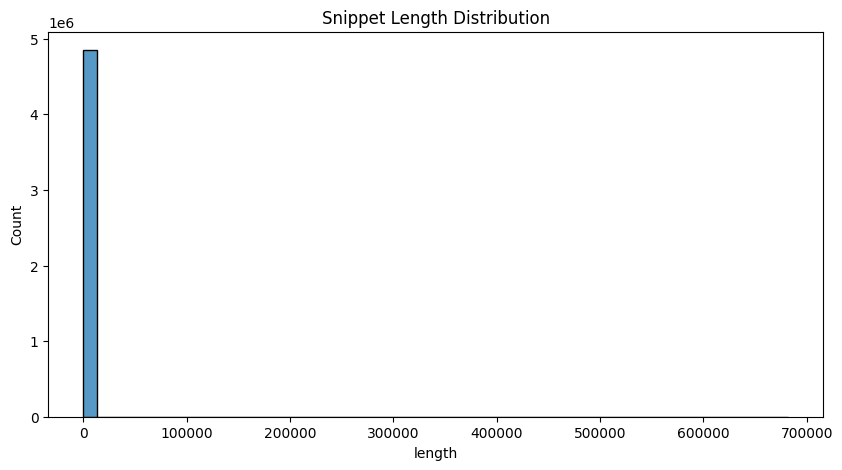

In [40]:
df['length'] = df['snippet'].astype(str).apply(len)
plt.figure(figsize=(10,5))
sns.histplot(df['length'], bins=50)
plt.title("Snippet Length Distribution")
plt.show()

In [41]:
print(df.isnull().sum())

id                        0
snippet                 477
language                  0
repo_file_name            0
github_repo_url           0
license                   0
commit_hash               0
starting_line_number      0
chunk_size                0
length                    0
dtype: int64


In [42]:
df = df.dropna(subset=['snippet']).reset_index(drop=True)



In [43]:
import pandas as pd

real_langs = ["C", "C++", "Java", "JavaScript", "Python", "Go", "Ruby", "Rust"]

# Filter for real languages
df_code = df[df["language"].isin(real_langs)]

# Sample 100k rows per language
samples = []
for lang in ["C", "C++", "Java", "JavaScript", "Python"]:
    sampled_lang = df_code[df_code["language"] == lang].sample(100_000, random_state=42)
    samples.append(sampled_lang)

df_code_sampled = pd.concat(samples)

# Sample unknown language rows
df_unknown = df[df["language"] == "UNKNOWN"].sample(100_000, random_state=42)

# Combine real and unknown languages
df_final = pd.concat([df_code_sampled, df_unknown]).reset_index(drop=True)

print("Final dataset shape:", df_final.shape)
print(df_final['language'].value_counts())


Final dataset shape: (600000, 10)
language
C             100000
C++           100000
Java          100000
JavaScript    100000
Python        100000
UNKNOWN       100000
Name: count, dtype: int64


In [44]:
def preprocess_code(code):
    if pd.isna(code):
        return ""
    
    code = str(code)
    
    # Remove single-line comments
    code = re.sub(r"//.*", "", code)
    
    # Remove multi-line comments
    code = re.sub(r"/\*.*?\*/", "", code, flags=re.DOTALL)
    
    # Remove strings "..."
    code = re.sub(r'"[^"]*"', '', code)
    
    # Normalize whitespace (no number removal)
    code = re.sub(r'\s+', ' ', code)
    
    return code.strip()

# Apply to your df_final (run this again after loading data)
df_final['clean_code'] = df_final['snippet'].astype(str).apply(preprocess_code)

In [45]:
vectorizer = TfidfVectorizer(
    analyzer='char',  # Change to 'word' if using tokenization above
    ngram_range=(3, 6),  # Slightly increased for better context
    min_df=5,
)

tfidf_matrix = vectorizer.fit_transform(df_final['clean_code'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (600000, 1332251)


In [51]:
def detect_language(code):
    code_lower = code.lower()
    
    if '#include' in code_lower or 'int main' in code_lower:
        return ['C', 'C++']  # C/C++ share keywords
    elif 'public static' in code_lower or 'class ' in code_lower and '{' in code:
        return ['Java']
    elif 'function ' in code_lower or 'const ' in code_lower or 'let ' in code_lower:
        return ['JavaScript']
    elif 'def ' in code_lower or 'import ' in code_lower or 'range(' in code_lower:
        return ['Python']
    # Add more for Go, Ruby, Rust if you expand sampling
    else:
        return None  # Unknown: search all


In [63]:
def get_similarity(query: str, top_k: int = 10, min_score: float = 0.5):
    query_clean = preprocess_code(query)
    query_vec = vectorizer.transform([query_clean])
    
    detected_langs = detect_language(query)
    
    if detected_langs:
        mask = df_final['language'].isin(detected_langs)
        filtered_matrix = tfidf_matrix[mask]
        filtered_df = df_final[mask].reset_index()
    else:
        filtered_matrix = tfidf_matrix
        filtered_df = df_final
    
    if filtered_matrix.shape[0] == 0:
        return {"message": "No matches found"}
    
    scores = cosine_similarity(query_vec, filtered_matrix).flatten()
    
    max_score = np.max(scores)
    if max_score > 0.70:
        return {"status": "Busted", "similarity_score": f"{float(max_score):.2f}", "message": "High similarity detected - possible copy-paste!"}
    
    high_score_idx = np.where(scores >= min_score)[0]
    if len(high_score_idx) == 0:
        return {"message": f"No strong matches found (all scores < {min_score})"}
    
    top_idx = scores[high_score_idx].argsort()[-top_k:][::-1]
    top_idx = high_score_idx[top_idx]
    
    results = []
    for idx in top_idx:
        orig_idx = filtered_df.index[idx]
        results.append({
            "score": f"{float(scores[idx]):.2f}",
            "language": df_final.at[orig_idx, "language"],
        })
    
    return {"status": "normal", "similarity score": f"{float(max_score):.2f}", "results": results}

In [64]:
test_code = """
        switch (choice) {
            case 1: // LIST FILES
                if (role == 1)
                    system("ls -l ./university");
                else if (role == 2)
                    system("ls -l ./university/professors");
                else
                    system("ls -l ./university/students/student1");
                break;

            case 2: // CHANGE PERMISSIONS (Dean only)
                if (role == 1) {
                    system("chmod 700 ./university/dean -R");
                    system("chmod 750 ./university/professors -R");
                    system("chmod 700 ./university/students/student1 -R");
                    printf("Permissions updated by Dean.\n");
                } else {
                    printf("Permission denied! Only Dean can change permissions.\n");
                }
                break;

            case 3: // CREATE OR DELETE FILES
                if (role == 1) {
                    system("touch ./university/dean/dean_file.txt");
                    printf("Dean created a file.\n");
                } else if (role == 2) {
                    system("mkdir ./university/professors/new_folder 2>/dev/null");
                    printf("Professor created a folder.\n");
                } else {
                    system("touch ./university/students/student1/student_note2.txt");
                    printf("Student created a file.\n");
                }
                break;

            case 4: // SYMBOLIC LINK (Dean only)
                if (role == 1) {
                    system("ln -s ./university/professors/lec1.txt ./university/prof_link.txt");
                    printf("Symbolic link created.\n");
                } else {
                    printf("Only Dean can create symbolic links.\n");
                }
                break;

            case 5: // COPY FILES
                if (role == 1 || role == 2) {
                    system("cp ./university/professors/lec1.txt ./university/professors/lec_copy.txt");
                    printf("File copied.\n");
                } else {
                    system("cp ./university/students/student1/student_note.txt ./university/students/student1/note_copy.txt");
                    printf("File copied.\n");
                }
                break;

            case 6: // MOVE FILES
                if (role == 1 || role == 2) {
                    system("mv ./university/professors/lec_copy.txt ./university/professors/moved_lec_copy.txt");
                    printf("File moved.\n");
                } else {
                    system("mv ./university/students/student1/student_note.txt ./university/students/student1/student_note_moved.txt");
                    printf("File moved.\n");
                }
                break;

            case 7: // REDIRECTION
                if (role == 1)
                    system("echo 'Dean log entry' >> ./university/dean/dean_log.txt");
                else if (role == 2)
                    system("echo 'Professor log entry' >> ./university/professors/prof_log.txt");
                else
                    system("echo 'Student assignment' > ./university/students/student1/assignment.txt");
                printf("Redirection done.\n");
                break;

            case 8: // ALIAS
                system("alias ll='ls -l'");
                printf("Alias created (works only in this program session).\n");
                break;

            case 9: // VIEW CONTENT
                if (role == 1)
                    system("cat ./university/professors/lec1.txt");
                else if (role == 2)
                    system("head ./university/professors/lec1.txt");
                else
                    system("tail ./university/students/student1/assignment.txt");
                break;

            case 10: // FIND
                if (role == 1 || role == 2)
                    system("find ./university -name '*.txt'");
                else
                    system("find ./university/students/student1 -name '*.txt'");
                break;

            default:
                printf("Invalid option.\n");
        }
"""

results = get_similarity(test_code)
results

{'status': 'normal',
 'similarity score': '0.60',
 'results': [{'score': '0.60', 'language': 'C++'}]}

In [67]:
import pickle
import scipy.sparse

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save TF-IDF matrix (sparse format)
scipy.sparse.save_npz('tfidf_matrix.npz', tfidf_matrix)

# Save df_final (for language and snippet info)
df_final.to_pickle('model.pkl')

print("Model saved successfully!")

Model saved successfully!
